In [ ]:
# 필요한 라이브러리 설치
!pip install dbfread pandas

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False
import seaborn as sns
from datetime import datetime

In [30]:
# 파일 경로
file_path = ('/content/drive/MyDrive/mulcam_bigdata/서울시_노후건물데이터.csv')

In [36]:
# 파일을 DataFrame으로 불러오기
raw = pd.read_csv(file_path)

<ipython-input-36-33e54d820135>:2: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  raw = pd.read_csv(file_path)


In [37]:
# # 다양한 인코딩 시도
# encodings = ['cp949', 'euc-kr', 'utf-8', 'latin1']

# for encoding in encodings:
#     try:
#         # 인코딩 지정하여 DBF 파일 읽기
#         table = csv(file_path, encoding=encoding)

#         # 데이터프레임으로 변환
#         df1 = pd.DataFrame(iter(table1))
#         df2 = pd.DataFrame(iter(table2))

#         print(f"인코딩 {encoding}로 파일을 성공적으로 읽었습니다.")
#         break  # 성공하면 루프 탈출
#     except UnicodeDecodeError as e:
#         print(f"인코딩 {encoding} 실패: {e}")
#     except Exception as e:
#         print(f"예상치 못한 오류 발생: {e}")

# # CSV 파일로 저장 (UTF-8 인코딩 지정)
# df1.to_csv('output_file1.csv', index=False, encoding='utf-8')
# df2.to_csv('output_file2.csv', index=False, encoding='utf-8')

In [38]:
df = raw.copy()

In [39]:
# 데이터 확인
df.head()

,A0,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A19,A20,A21,A22,A23,A24,A25,A26,A27,A28
0,32,1991201839054527769900000000,1111017500107040000,1111017500,서울특별시 종로구 숭인동,704,1,일반,01000,단독주택,...,29692,N,B00100000000T30Z9,2024-07-03,11110,NaN,NaN,3.0,0.0,2017-05-30
1,34,1967201343844527773800000000,1111017500100560024,1111017500,서울특별시 종로구 숭인동,56-24,1,일반,01000,단독주택,...,12540,N,B00100000000T311B,2024-07-03,11110,NaN,NaN,3.0,0.0,2018-06-19
2,36,1962201375194527742000000000,1111017500100560054,1111017500,서울특별시 종로구 숭인동,56-54,1,일반,01000,단독주택,...,24867,N,B00100000000T313D,2024-07-03,11110,NaN,NaN,2.0,0.0,2017-02-24
3,37,1979201388484527710100000000,1111017500100560053,1111017500,서울특별시 종로구 숭인동,56-53,1,일반,01000,단독주택,...,13915,N,B00100000000T314E,2024-07-03,11110,NaN,NaN,2.0,1.0,2018-11-06
4,38,0000200468294527764000000000,1111016500100280011,1111016500,서울특별시 종로구 이화동,28-11,1,일반,NaN,NaN,...,NaN,NaN,B00100000000T315F,2024-07-03,11110,NaN,NaN,0.0,0.0,NaN


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696069 entries, 0 to 696068
Data columns (total 29 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   A0      696069 non-null  int64  
 1   A1      696069 non-null  object 
 2   A2      696069 non-null  int64  
 3   A3      696069 non-null  int64  
 4   A4      696069 non-null  object 
 5   A5      696069 non-null  object 
 6   A6      696069 non-null  int64  
 7   A7      696069 non-null  object 
 8   A8      546353 non-null  object 
 9   A9      546349 non-null  object 
 10  A10     546136 non-null  float64
 11  A11     546102 non-null  object 
 12  A12     696009 non-null  float64
 13  A13     544512 non-null  object 
 14  A14     696069 non-null  float64
 15  A15     695546 non-null  float64
 16  A16     695990 non-null  float64
 17  A17     695450 non-null  float64
 18  A18     695428 non-null  float64
 19  A19     546367 non-null  object 
 20  A20     542298 non-null  object 
 21  A21     65

In [41]:
df.columns

Index(['A0', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20',
       'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28'],
      dtype='object')

In [42]:
# 컬럼명 매핑 사전 정의
column_mapping = {
    'A0': '원천도형ID',
    'A1': 'GIS건물통합식별번호',
    'A2': '고유번호',
    'A3': '법정동코드',
    'A4': '법정동명',
    'A5': '지번',
    'A6': '특수지코드',
    'A7': '특수지구분명',
    'A8': '건축물용도코드',
    'A9': '건축물용도명',
    'A10': '건축물구조코드',
    'A11': '건축물구조명',
    'A12': '건축물면적(㎡)',
    'A13': '사용승인일자',
    'A14': '연면적',
    'A15': '대지면적(㎡)',
    'A16': '높이(m)',
    'A17': '건폐율(%)',
    'A18': '용적율(%)',
    'A19': '건축물ID',
    'A20': '위반건축물여부',
    'A21': '참조체계연계키',
    'A22': '데이터기준일자',
    'A23': '원천시도시군구코드',
    'A24': '건물명',
    'A25': '건물동명',
    'A26': '지상층_수',
    'A27': '지하층_수',
    'A28': '데이터생성변경일자'
}

# 컬럼명 변경
df.rename(columns=column_mapping, inplace=True)

In [43]:
df.columns

Index(['원천도형ID', 'GIS건물통합식별번호', '고유번호', '법정동코드', '법정동명', '지번', '특수지코드',
       '특수지구분명', '건축물용도코드', '건축물용도명', '건축물구조코드', '건축물구조명', '건축물면적(㎡)',
       '사용승인일자', '연면적', '대지면적(㎡)', '높이(m)', '건폐율(%)', '용적율(%)', '건축물ID',
       '위반건축물여부', '참조체계연계키', '데이터기준일자', '원천시도시군구코드', '건물명', '건물동명', '지상층_수',
       '지하층_수', '데이터생성변경일자'],
      dtype='object')

In [44]:
df.describe()

,원천도형ID,고유번호,법정동코드,특수지코드,건축물구조코드,건축물면적(㎡),연면적,대지면적(㎡),높이(m),건폐율(%),용적율(%),원천시도시군구코드,지상층_수,지하층_수
count,696069.000000,6.960690e+05,6.960690e+05,696069.000000,546136.000000,6.960090e+05,6.960690e+05,6.955460e+05,695990.000000,695450.000000,695428.000000,696069.000000,696041.000000,695579.000000
mean,21160.737311,1.141147e+18,1.141147e+09,1.015409,18.239261,1.399686e+02,1.134305e+03,1.470943e+03,6.012963,25.778536,78.993032,11411.353465,2.642892,0.579284
std,17351.612256,1.843042e+16,1.843042e+07,0.123175,9.249501,3.713316e+03,5.590271e+04,8.391960e+04,23.489605,180.588494,639.480553,184.310971,3.015898,0.605740
min,1.000000,1.111010e+18,1.111010e+09,1.000000,10.000000,-1.862300e+02,-2.407000e+01,0.000000e+00,-4.800000,0.000000,0.000000,11110.000000,0.000000,0.000000
25%,8973.000000,1.126010e+18,1.126010e+09,1.000000,11.000000,0.000000e+00,3.967000e+01,0.000000e+00,0.000000,0.000000,0.000000,11260.000000,1.000000,0.000000
50%,18067.000000,1.141011e+18,1.141010e+09,1.000000,21.000000,6.274000e+01,1.964400e+02,0.000000e+00,0.000000,0.000000,0.000000,11410.000000,2.000000,1.000000
75%,28618.000000,1.156013e+18,1.156013e+09,1.000000,21.000000,1.109700e+02,4.313500e+02,1.750000e+02,10.300000,57.000000,153.270000,11560.000000,4.000000,1.000000
max,175207.000000,1.174011e+18,1.174011e+09,2.000000,99.000000,1.077005e+06,1.529733e+07,3.889012e+07,13418.000000,79095.000000,294393.000000,11740.000000,69.000000,10.000000


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696069 entries, 0 to 696068
Data columns (total 29 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   원천도형ID       696069 non-null  int64  
 1   GIS건물통합식별번호  696069 non-null  object 
 2   고유번호         696069 non-null  int64  
 3   법정동코드        696069 non-null  int64  
 4   법정동명         696069 non-null  object 
 5   지번           696069 non-null  object 
 6   특수지코드        696069 non-null  int64  
 7   특수지구분명       696069 non-null  object 
 8   건축물용도코드      546353 non-null  object 
 9   건축물용도명       546349 non-null  object 
 10  건축물구조코드      546136 non-null  float64
 11  건축물구조명       546102 non-null  object 
 12  건축물면적(㎡)     696009 non-null  float64
 13  사용승인일자       544512 non-null  object 
 14  연면적          696069 non-null  float64
 15  대지면적(㎡)      695546 non-null  float64
 16  높이(m)        695990 non-null  float64
 17  건폐율(%)       695450 non-null  float64
 18  용적율(%)       695428 non-

In [46]:
# 사용승인일자 컬럼에 결측값이 있는 행을 제거
# 사용승인일자가 존재하지않는 건물은 사용용도 또한 나와 있지 않음 그래서 전부 날려버림
df_cleaned = df.dropna(subset=['사용승인일자'])

In [47]:
# 결과 확인
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 544512 entries, 0 to 696068
Data columns (total 29 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   원천도형ID       544512 non-null  int64  
 1   GIS건물통합식별번호  544512 non-null  object 
 2   고유번호         544512 non-null  int64  
 3   법정동코드        544512 non-null  int64  
 4   법정동명         544512 non-null  object 
 5   지번           544512 non-null  object 
 6   특수지코드        544512 non-null  int64  
 7   특수지구분명       544512 non-null  object 
 8   건축물용도코드      527311 non-null  object 
 9   건축물용도명       527307 non-null  object 
 10  건축물구조코드      527297 non-null  float64
 11  건축물구조명       527266 non-null  object 
 12  건축물면적(㎡)     544453 non-null  float64
 13  사용승인일자       544512 non-null  object 
 14  연면적          544512 non-null  float64
 15  대지면적(㎡)      544010 non-null  float64
 16  높이(m)        544438 non-null  float64
 17  건폐율(%)       543915 non-null  float64
 18  용적율(%)       543895 non-null 

In [56]:
# 사용승인일자 컬럼을 datetime 타입으로 변환
df_cleaned['사용승인일자'] = pd.to_datetime(df_cleaned['사용승인일자'], errors='coerce')

# 사용승인일자 컬럼에 결측값이 있는 행을 제거
df_cleaned = df_cleaned.dropna(subset=['사용승인일자'])

<ipython-input-56-0b37947e1461>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['사용승인일자'] = pd.to_datetime(df_cleaned['사용승인일자'], errors='coerce')


In [57]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 544492 entries, 0 to 696068
Data columns (total 29 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   원천도형ID       544492 non-null  int64         
 1   GIS건물통합식별번호  544492 non-null  object        
 2   고유번호         544492 non-null  int64         
 3   법정동코드        544492 non-null  int64         
 4   법정동명         544492 non-null  object        
 5   지번           544492 non-null  object        
 6   특수지코드        544492 non-null  int64         
 7   특수지구분명       544492 non-null  object        
 8   건축물용도코드      527292 non-null  object        
 9   건축물용도명       527288 non-null  object        
 10  건축물구조코드      527278 non-null  float64       
 11  건축물구조명       527247 non-null  object        
 12  건축물면적(㎡)     544433 non-null  float64       
 13  사용승인일자       544492 non-null  datetime64[ns]
 14  연면적          544492 non-null  float64       
 15  대지면적(㎡)      543990 non-null  float64  

In [66]:
# 현재 연도 설정
current_year = 2024

In [67]:
# 사용승인일자에서 연도만 추출하고 건물 연령 계산
df_cleaned['사용승인연도'] = df_cleaned['사용승인일자'].dt.year
df_cleaned['건물연령'] = current_year - df_cleaned['사용승인연도']

In [68]:
# 20년 이상 30년 미만인 건물과 30년 이상 된 건물 컬럼 추가
df_cleaned['20년_30년미만'] = (df_cleaned['건물연령'] >= 20) & (df_cleaned['건물연령'] < 30)
df_cleaned['30년_이상'] = df_cleaned['건물연령'] >= 30

In [69]:
# 결과 확인
print(df_cleaned[['사용승인일자', '사용승인연도', '건물연령', '20년_30년미만', '30년_이상']])

           사용승인일자  사용승인연도  건물연령  20년_30년미만  30년_이상
0      1991-09-02    1991    33      False    True
1      1967-05-28    1967    57      False    True
2      1962-12-21    1962    62      False    True
3      1979-06-01    1979    45      False    True
5      1994-04-25    1994    30      False    True
...           ...     ...   ...        ...     ...
696064 1990-01-04    1990    34      False    True
696065 1995-08-30    1995    29       True   False
696066 2003-08-13    2003    21       True   False
696067 1993-12-22    1993    31      False    True
696068 2005-11-24    2005    19      False   False

[544492 rows x 5 columns]


In [70]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 544492 entries, 0 to 696068
Data columns (total 33 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   원천도형ID       544492 non-null  int64         
 1   GIS건물통합식별번호  544492 non-null  object        
 2   고유번호         544492 non-null  int64         
 3   법정동코드        544492 non-null  int64         
 4   법정동명         544492 non-null  object        
 5   지번           544492 non-null  object        
 6   특수지코드        544492 non-null  int64         
 7   특수지구분명       544492 non-null  object        
 8   건축물용도코드      527292 non-null  object        
 9   건축물용도명       527288 non-null  object        
 10  건축물구조코드      527278 non-null  float64       
 11  건축물구조명       527247 non-null  object        
 12  건축물면적(㎡)     544433 non-null  float64       
 13  사용승인일자       544492 non-null  datetime64[ns]
 14  연면적          544492 non-null  float64       
 15  대지면적(㎡)      543990 non-null  float64  

In [71]:
# 법정동명에서 구 추출
def extract_district(dong_name):
    if pd.isna(dong_name):
        return None
    # "구"가 포함된 부분 추출
    pos = dong_name.find('구')
    if pos != -1:
        return dong_name[:pos+1]  # "구"를 포함한 부분을 반환
    return None

df_cleaned['구'] = df_cleaned['법정동명'].apply(extract_district)

In [72]:
# 결과 확인
print(df_cleaned[['법정동명', '구']])

                 법정동명          구
0       서울특별시 종로구 숭인동  서울특별시 종로구
1       서울특별시 종로구 숭인동  서울특별시 종로구
2       서울특별시 종로구 숭인동  서울특별시 종로구
3       서울특별시 종로구 숭인동  서울특별시 종로구
5       서울특별시 종로구 이화동  서울특별시 종로구
...               ...        ...
696064  서울특별시 용산구 후암동  서울특별시 용산구
696065  서울특별시 용산구 후암동  서울특별시 용산구
696066  서울특별시 서초구 서초동  서울특별시 서초구
696067  서울특별시 광진구 자양동  서울특별시 광진구
696068   서울특별시 중구 신당동   서울특별시 중구

[544492 rows x 2 columns]


In [74]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 544492 entries, 0 to 696068
Data columns (total 34 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   원천도형ID       544492 non-null  int64         
 1   GIS건물통합식별번호  544492 non-null  object        
 2   고유번호         544492 non-null  int64         
 3   법정동코드        544492 non-null  int64         
 4   법정동명         544492 non-null  object        
 5   지번           544492 non-null  object        
 6   특수지코드        544492 non-null  int64         
 7   특수지구분명       544492 non-null  object        
 8   건축물용도코드      527292 non-null  object        
 9   건축물용도명       527288 non-null  object        
 10  건축물구조코드      527278 non-null  float64       
 11  건축물구조명       527247 non-null  object        
 12  건축물면적(㎡)     544433 non-null  float64       
 13  사용승인일자       544492 non-null  datetime64[ns]
 14  연면적          544492 non-null  float64       
 15  대지면적(㎡)      543990 non-null  float64  

In [76]:
df_cleaned.columns

Index(['원천도형ID', 'GIS건물통합식별번호', '고유번호', '법정동코드', '법정동명', '지번', '특수지코드',
       '특수지구분명', '건축물용도코드', '건축물용도명', '건축물구조코드', '건축물구조명', '건축물면적(㎡)',
       '사용승인일자', '연면적', '대지면적(㎡)', '높이(m)', '건폐율(%)', '용적율(%)', '건축물ID',
       '위반건축물여부', '참조체계연계키', '데이터기준일자', '원천시도시군구코드', '건물명', '건물동명', '지상층_수',
       '지하층_수', '데이터생성변경일자', '사용승인연도', '건물연령', '20년_30년미만', '30년_이상', '구'],
      dtype='object')

In [83]:
# 컬럼 삭제
columns_to_drop = [
    '원천도형ID', 'GIS건물통합식별번호', '고유번호', '법정동코드',
    '특수지코드', '건축물용도코드', '건축물구조코드', '참조체계연계키'
]

df_cleaned = df_cleaned.drop(columns=columns_to_drop)

In [84]:
# 최종 컬럼 순서 설정
final_columns = [
    '법정동명', '구', '지번', '특수지구분명', '건축물용도명', '건축물구조명',
    '건축물면적(㎡)', '연면적', '대지면적(㎡)', '높이(m)', '건폐율(%)',
    '용적율(%)', '건축물ID', '위반건축물여부', '데이터기준일자',
    '원천시도시군구코드', '건물명', '건물동명', '지상층_수', '지하층_수',
    '데이터생성변경일자', '사용승인연도','20년_30년미만', '30년_이상', '건물연령'
]

df_cleaned = df_cleaned[final_columns]

In [85]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 544492 entries, 0 to 696068
Data columns (total 25 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   법정동명       544492 non-null  object 
 1   구          544492 non-null  object 
 2   지번         544492 non-null  object 
 3   특수지구분명     544492 non-null  object 
 4   건축물용도명     527288 non-null  object 
 5   건축물구조명     527247 non-null  object 
 6   건축물면적(㎡)   544433 non-null  float64
 7   연면적        544492 non-null  float64
 8   대지면적(㎡)    543990 non-null  float64
 9   높이(m)      544418 non-null  float64
 10  건폐율(%)     543895 non-null  float64
 11  용적율(%)     543875 non-null  float64
 12  건축물ID      527258 non-null  object 
 13  위반건축물여부    522808 non-null  object 
 14  데이터기준일자    544492 non-null  object 
 15  원천시도시군구코드  544492 non-null  int64  
 16  건물명        98462 non-null   object 
 17  건물동명       55997 non-null   object 
 18  지상층_수      544465 non-null  float64
 19  지하층_수      544036 non-null  

In [86]:
df_cleaned.head()

,법정동명,구,지번,특수지구분명,건축물용도명,건축물구조명,건축물면적(㎡),연면적,대지면적(㎡),높이(m),...,원천시도시군구코드,건물명,건물동명,지상층_수,지하층_수,데이터생성변경일자,사용승인연도,20년_30년미만,30년_이상,건물연령
0,서울특별시 종로구 숭인동,서울특별시 종로구,704,일반,단독주택,기타강구조,57.60,203.13,100.6,9.1,...,11110,NaN,NaN,3.0,0.0,2017-05-30,1991,False,True,33
1,서울특별시 종로구 숭인동,서울특별시 종로구,56-24,일반,단독주택,벽돌구조,0.00,114.98,0.0,0.0,...,11110,NaN,NaN,3.0,0.0,2018-06-19,1967,False,True,57
2,서울특별시 종로구 숭인동,서울특별시 종로구,56-54,일반,단독주택,벽돌구조,0.00,135.20,0.0,0.0,...,11110,NaN,NaN,2.0,0.0,2017-02-24,1962,False,True,62
3,서울특별시 종로구 숭인동,서울특별시 종로구,56-53,일반,단독주택,벽돌구조,0.00,230.18,0.0,0.0,...,11110,NaN,NaN,2.0,1.0,2018-11-06,1979,False,True,45
5,서울특별시 종로구 이화동,서울특별시 종로구,28-41,일반,제2종근린생활시설,철근콘크리트구조,100.05,598.27,229.8,14.7,...,11110,NaN,NaN,5.0,1.0,2017-03-30,1994,False,True,30


In [87]:
# 법정동명에서 구를 추출한 후 지역명을 제거
def clean_district(district_name):
    if pd.isna(district_name):
        return None

    # 구 이름에서 특정 지역명을 제거
    district_name = district_name.replace('서울특별시 ', '')
    return district_name

In [88]:
# '구' 컬럼에서 지역명 제거
df_cleaned['구'] = df_cleaned['구'].apply(clean_district)

# 결과 확인
print(df_cleaned[['구']])

          구
0       종로구
1       종로구
2       종로구
3       종로구
5       종로구
...     ...
696064  용산구
696065  용산구
696066  서초구
696067  광진구
696068   중구

[544492 rows x 1 columns]


In [89]:
df_cleaned.head()

,법정동명,구,지번,특수지구분명,건축물용도명,건축물구조명,건축물면적(㎡),연면적,대지면적(㎡),높이(m),...,원천시도시군구코드,건물명,건물동명,지상층_수,지하층_수,데이터생성변경일자,사용승인연도,20년_30년미만,30년_이상,건물연령
0,서울특별시 종로구 숭인동,종로구,704,일반,단독주택,기타강구조,57.60,203.13,100.6,9.1,...,11110,NaN,NaN,3.0,0.0,2017-05-30,1991,False,True,33
1,서울특별시 종로구 숭인동,종로구,56-24,일반,단독주택,벽돌구조,0.00,114.98,0.0,0.0,...,11110,NaN,NaN,3.0,0.0,2018-06-19,1967,False,True,57
2,서울특별시 종로구 숭인동,종로구,56-54,일반,단독주택,벽돌구조,0.00,135.20,0.0,0.0,...,11110,NaN,NaN,2.0,0.0,2017-02-24,1962,False,True,62
3,서울특별시 종로구 숭인동,종로구,56-53,일반,단독주택,벽돌구조,0.00,230.18,0.0,0.0,...,11110,NaN,NaN,2.0,1.0,2018-11-06,1979,False,True,45
5,서울특별시 종로구 이화동,종로구,28-41,일반,제2종근린생활시설,철근콘크리트구조,100.05,598.27,229.8,14.7,...,11110,NaN,NaN,5.0,1.0,2017-03-30,1994,False,True,30


In [90]:
# 삭제할 컬럼 리스트
columns_to_drop = [
    '원천시도시군구코드', '건물명', '건물동명'
]

# 지정된 컬럼들을 삭제
df_cleaned = df_cleaned.drop(columns=columns_to_drop)

            법정동명    구     지번 특수지구분명     건축물용도명    건축물구조명  건축물면적(㎡)     연면적  \
0  서울특별시 종로구 숭인동  종로구    704     일반       단독주택     기타강구조     57.60  203.13   
1  서울특별시 종로구 숭인동  종로구  56-24     일반       단독주택      벽돌구조      0.00  114.98   
2  서울특별시 종로구 숭인동  종로구  56-54     일반       단독주택      벽돌구조      0.00  135.20   
3  서울특별시 종로구 숭인동  종로구  56-53     일반       단독주택      벽돌구조      0.00  230.18   
5  서울특별시 종로구 이화동  종로구  28-41     일반  제2종근린생활시설  철근콘크리트구조    100.05  598.27   

   대지면적(㎡)  높이(m)  ...  건축물ID  위반건축물여부     데이터기준일자 지상층_수 지하층_수   데이터생성변경일자  \
0    100.6    9.1  ...  29692        N  2024-07-03   3.0   0.0  2017-05-30   
1      0.0    0.0  ...  12540        N  2024-07-03   3.0   0.0  2018-06-19   
2      0.0    0.0  ...  24867        N  2024-07-03   2.0   0.0  2017-02-24   
3      0.0    0.0  ...  13915        N  2024-07-03   2.0   1.0  2018-11-06   
5    229.8   14.7  ...  17029        N  2024-07-03   5.0   1.0  2017-03-30   

   사용승인연도 20년_30년미만  30년_이상  건물연령  
0    1991     False    Tru

In [91]:
# 결과 확인
df_cleaned.head()

,법정동명,구,지번,특수지구분명,건축물용도명,건축물구조명,건축물면적(㎡),연면적,대지면적(㎡),높이(m),...,건축물ID,위반건축물여부,데이터기준일자,지상층_수,지하층_수,데이터생성변경일자,사용승인연도,20년_30년미만,30년_이상,건물연령
0,서울특별시 종로구 숭인동,종로구,704,일반,단독주택,기타강구조,57.60,203.13,100.6,9.1,...,29692,N,2024-07-03,3.0,0.0,2017-05-30,1991,False,True,33
1,서울특별시 종로구 숭인동,종로구,56-24,일반,단독주택,벽돌구조,0.00,114.98,0.0,0.0,...,12540,N,2024-07-03,3.0,0.0,2018-06-19,1967,False,True,57
2,서울특별시 종로구 숭인동,종로구,56-54,일반,단독주택,벽돌구조,0.00,135.20,0.0,0.0,...,24867,N,2024-07-03,2.0,0.0,2017-02-24,1962,False,True,62
3,서울특별시 종로구 숭인동,종로구,56-53,일반,단독주택,벽돌구조,0.00,230.18,0.0,0.0,...,13915,N,2024-07-03,2.0,1.0,2018-11-06,1979,False,True,45
5,서울특별시 종로구 이화동,종로구,28-41,일반,제2종근린생활시설,철근콘크리트구조,100.05,598.27,229.8,14.7,...,17029,N,2024-07-03,5.0,1.0,2017-03-30,1994,False,True,30


In [92]:
df_cleaned.columns

Index(['법정동명', '구', '지번', '특수지구분명', '건축물용도명', '건축물구조명', '건축물면적(㎡)', '연면적',
       '대지면적(㎡)', '높이(m)', '건폐율(%)', '용적율(%)', '건축물ID', '위반건축물여부', '데이터기준일자',
       '지상층_수', '지하층_수', '데이터생성변경일자', '사용승인연도', '20년_30년미만', '30년_이상', '건물연령'],
      dtype='object')

In [93]:
# 각 구별로 '20년_30년미만'과 '30년_이상'의 건물 수 집계
age_distribution = df_cleaned.groupby('구').agg({
    '20년_30년미만': 'sum',
    '30년_이상': 'sum'
})

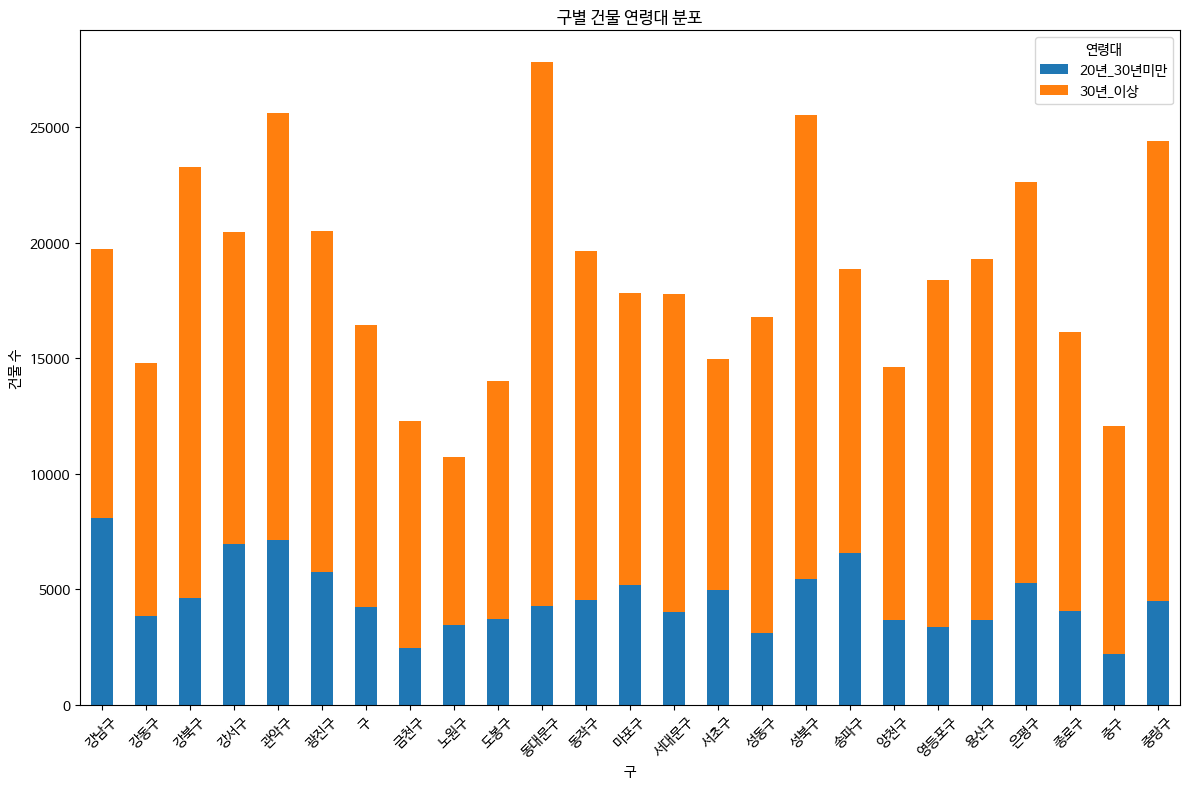

In [94]:
# 시각화
ax = age_distribution.plot(kind='bar', stacked=True, figsize=(12, 8))

# 그래프 제목과 레이블 설정
plt.title('구별 건물 연령대 분포')
plt.xlabel('구')
plt.ylabel('건물 수')
plt.legend(title='연령대')
plt.xticks(rotation=45)
plt.tight_layout()

# 그래프 표시
plt.show()

In [95]:
df_cleaned.to_csv('서울시건물최종정보.csv', index=False, encoding='utf-8')